# Milestone 4. Progress report 

Link to GitHub repo:  https://github.com/navydhara79/cs418-sp23-DarthVader

## Changes: 

- There have not been any significant changes to report
- Our aim has remained the same since the last check-in and we are working on progress towards sour aim.

## Data: 

- We have decided on working with the 2015 earthquake open portal data. 
- This is a very large, unprocessed data of 11 earthquake affected districts,  762,106 buildings and 3,677,173 individuals. There are 38 features in total in 3 datasets, like building’s age, # floors, use etc.
- The data is raw and noisy with missing values and poses challenges for data cleaning. 

The three datasets we are working on are described below: 



1.  csv_building_damage_assessment: This dataset contains information about the extent of damage to buildings caused by the earthquake. It includes columns such as building ID, building location, building type, degree of damage (e.g. destroyed, severely damaged, moderately damaged, lightly damaged), and the estimated cost of repair. This dataset can be used to analyze the overall impact of the earthquake on buildings in different regions, as well as to explore factors that may have influenced the degree of damage to different types of buildings.
2.  csv_building_structure: This dataset contains information about the structural characteristics of buildings, such as the number of stories, construction materials, and age. It also includes information about the seismic hazard zone of the building, based on the Nepal Building Code. This dataset can be used to analyze the relationship between building structure and the degree of damage caused by the earthquake, as well as to identify factors that may contribute to the vulnerability of certain types of buildings
3. csv_building_ownership_and_use: This dataset contains information about the ownership and use of buildings, such as whether the building is owned by an individual or an organization, and whether it is used for residential or non-residential purposes. It also includes information about the occupancy status of the building at the time of the earthquake. This dataset can be used to explore the relationship between building ownership, use, and occupancy status, and the degree of damage caused by the earthquake.

The details of the data have been displayed below

In [4]:
import copy
import pandas as pd
pd.set_option("display.max_columns", None)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr


In [5]:
df_damage = pd.read_csv("CSV_BU~1.CSV", low_memory=False)
df_structure = pd.read_csv('csv_building_structure.csv', low_memory=False)
df_own = pd.read_csv('CSV_BU~2.CSV',  low_memory=False)

In [6]:
df_damage.head()

,building_id,district_id,vdcmun_id,ward_id,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,damage_foundation_severe,damage_foundation_moderate,damage_foundation_insignificant,damage_roof_severe,damage_roof_moderate,damage_roof_insignificant,damage_corner_separation_severe,damage_corner_separation_moderate,damage_corner_separation_insignificant,damage_diagonal_cracking_severe,damage_diagonal_cracking_moderate,damage_diagonal_cracking_insignificant,damage_in_plane_failure_severe,damage_in_plane_failure_moderate,damage_in_plane_failure_insignificant,damage_out_of_plane_failure_severe,damage_out_of_plane_failure_moderate,damage_out_of_plane_failure_insignificant,damage_out_of_plane_failure_walls_ncfr_severe,damage_out_of_plane_failure_walls_ncfr_moderate,damage_out_of_plane_failure_walls_ncfr_insignificant,damage_gable_failure_severe,damage_gable_failure_moderate,damage_gable_failure_insignificant,damage_delamination_failure_severe,damage_delamination_failure_moderate,damage_delamination_failure_insignificant,damage_column_failure_severe,damage_column_failure_moderate,damage_column_failure_insignificant,damage_beam_failure_severe,damage_beam_failure_moderate,damage_beam_failure_insignificant,damage_infill_partition_failure_severe,damage_infill_partition_failure_moderate,damage_infill_partition_failure_insignificant,damage_staircase_severe,damage_staircase_moderate,damage_staircase_insignificant,damage_parapet_severe,damage_parapet_moderate,damage_parapet_insignificant,damage_cladding_glazing_severe,damage_cladding_glazing_moderate,damage_cladding_glazing_insignificant,area_assesed,damage_grade,technical_solution_proposed,has_repair_started,has_damage_foundation,has_damage_roof,has_damage_corner_separation,has_damage_diagonal_cracking,has_damage_in_plane_failure,has_damage_out_of_plane_failure,has_damage_out_of_plane_walls_ncfr_failure,has_damage_gable_failure,has_damage_delamination_failure,has_damage_column_failure,has_damage_beam_failure,has_damage_infill_partition_failure,has_damage_staircase,has_damage_parapet,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
0,120101000011,12,1207,120703,Moderate-Heavy,Insignificant/light,None,NaN,Moderate-Heavy-(<1/3),Insignificant/light-(<1/3),Severe-Extreme-(<1/3),NaN,Insignificant/light-(>2/3),Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(<1/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,NaN,Moderate-Heavy-(>2/3),NaN,Severe-Extreme-(>2/3),NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,Both,Grade 3,Major repair,0.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Severe-Extreme,Severe-Extreme,Insignificant/light,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,None,NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,Exterior,Grade 5,Reconstruction,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,NaN,Insignificant/light-(1/3-2/3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,Both,Grade 2,Minor repair,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Moderate-Heavy,Mod

In [7]:
df_own.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_structure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


## Problem: 
- Classifying the damage of a building/property is quite important as it will help in multiple areas like compensations, support and also for officers to set perimeters around property for safeguarding others. 

- We propose to build a data science project, to classify the damage into one of the three classes, using data science methods. 

- The project focuses on Data Cleaning, Exploratory data analysis, application of some basic algorithms to classify the damage. 

- This problem is important for a number of reasons. Firstly, it has significant implications for individuals and communities affected by the earthquake. Accurately assessing the extent of damage to buildings/properties can help decision-makers to allocate resources effectively, to support the recovery efforts and provide assistance to those who need it most. Additionally, it can help to mitigate risks for the wider community by identifying buildings/properties that pose a safety risk.

- We chose this problem because it is a critical issue in the aftermath of natural disasters, particularly in regions that are vulnerable to earthquakes. There is often a lack of data-driven methods for assessing the extent of damage to buildings/properties, which can lead to inefficiencies and inconsistencies in decision-making around support and compensation. By leveraging data science methods to classify the damage of buildings/properties, we aim to provide a more accurate and efficient way of assessing the impact of natural disasters on built environments.


## Research questions: 



1.   **Idea 1 - Navyadhara**: Can we predict the level of damage caused by the 2015 Nepal earthquake to buildings based on their ownership, use, and structure characteristics?



2.  **Idea 2 - Sandeep**: Is there a relationship between the demographic characteristics of households in the areas affected by the 2015 Nepal earthquake and their vulnerability to the earthquake?

## Data cleaning:

In [9]:
df_damage.head()

,building_id,district_id,vdcmun_id,ward_id,damage_overall_collapse,damage_overall_leaning,damage_overall_adjacent_building_risk,damage_foundation_severe,damage_foundation_moderate,damage_foundation_insignificant,damage_roof_severe,damage_roof_moderate,damage_roof_insignificant,damage_corner_separation_severe,damage_corner_separation_moderate,damage_corner_separation_insignificant,damage_diagonal_cracking_severe,damage_diagonal_cracking_moderate,damage_diagonal_cracking_insignificant,damage_in_plane_failure_severe,damage_in_plane_failure_moderate,damage_in_plane_failure_insignificant,damage_out_of_plane_failure_severe,damage_out_of_plane_failure_moderate,damage_out_of_plane_failure_insignificant,damage_out_of_plane_failure_walls_ncfr_severe,damage_out_of_plane_failure_walls_ncfr_moderate,damage_out_of_plane_failure_walls_ncfr_insignificant,damage_gable_failure_severe,damage_gable_failure_moderate,damage_gable_failure_insignificant,damage_delamination_failure_severe,damage_delamination_failure_moderate,damage_delamination_failure_insignificant,damage_column_failure_severe,damage_column_failure_moderate,damage_column_failure_insignificant,damage_beam_failure_severe,damage_beam_failure_moderate,damage_beam_failure_insignificant,damage_infill_partition_failure_severe,damage_infill_partition_failure_moderate,damage_infill_partition_failure_insignificant,damage_staircase_severe,damage_staircase_moderate,damage_staircase_insignificant,damage_parapet_severe,damage_parapet_moderate,damage_parapet_insignificant,damage_cladding_glazing_severe,damage_cladding_glazing_moderate,damage_cladding_glazing_insignificant,area_assesed,damage_grade,technical_solution_proposed,has_repair_started,has_damage_foundation,has_damage_roof,has_damage_corner_separation,has_damage_diagonal_cracking,has_damage_in_plane_failure,has_damage_out_of_plane_failure,has_damage_out_of_plane_walls_ncfr_failure,has_damage_gable_failure,has_damage_delamination_failure,has_damage_column_failure,has_damage_beam_failure,has_damage_infill_partition_failure,has_damage_staircase,has_damage_parapet,has_damage_cladding_glazing,has_geotechnical_risk,has_geotechnical_risk_land_settlement,has_geotechnical_risk_fault_crack,has_geotechnical_risk_liquefaction,has_geotechnical_risk_landslide,has_geotechnical_risk_rock_fall,has_geotechnical_risk_flood,has_geotechnical_risk_other
0,120101000011,12,1207,120703,Moderate-Heavy,Insignificant/light,None,NaN,Moderate-Heavy-(<1/3),Insignificant/light-(<1/3),Severe-Extreme-(<1/3),NaN,Insignificant/light-(>2/3),Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(<1/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,NaN,Moderate-Heavy-(>2/3),NaN,Severe-Extreme-(>2/3),NaN,NaN,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,Both,Grade 3,Major repair,0.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Severe-Extreme,Severe-Extreme,Insignificant/light,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,None,NaN,NaN,Severe-Extreme-(>2/3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,None,NaN,NaN,Exterior,Grade 5,Reconstruction,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Moderate-Heavy,Moderate-Heavy,Moderate-Heavy,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,Moderate-Heavy-(>2/3),NaN,NaN,NaN,Insignificant/light-(1/3-2/3),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None,NaN,NaN,Both,Grade 2,Minor repair,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Moderate-Heavy,Mod

In [10]:
df_structure.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [11]:
df_own.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [12]:
print("Initial size of Damage data:", df_damage.size)
print("Initial size of structure data:", df_structure.size)
print("Initial size of ownership_and_use data:", df_own.size)

Initial size of Damage data: 60206374
Initial size of structure data: 23625286
Initial size of ownership_and_use data: 12955802


Step-1: Dropping the unnecessary fields

In [13]:
needed_damage = ['building_id','damage_overall_collapse']
unnecasry_structure = ['condition_post_eq', 'technical_solution_proposed']

df_damage = df_damage[needed_damage]
df_structure = df_structure.drop(unnecasry_structure, axis = 1)

In [14]:
df_damage.damage_overall_collapse.value_counts()

Moderate-Heavy         205442
Severe-Extreme         115878
Insignificant/light    107614
None                    71809
Name: damage_overall_collapse, dtype: int64

Step-2: Merging the dataframes into single dataframe for future use

In [15]:
df_merged = df_damage.merge(df_structure,on='building_id').merge(df_own,on='building_id')

In [16]:
df_merged= df_merged.replace('None',None)

In [17]:
df_merged.shape

(762106, 46)

Step-3: Checking for null values

In [18]:
null_cols = [(col, df_merged[col].isnull().sum()) for col in df_merged.columns if df_merged[col].isnull().sum()>0]

null_cols

[('damage_overall_collapse', 333172),
 ('position', 1),
 ('plan_configuration', 1),
 ('damage_grade', 12),
 ('count_families', 2),
 ('has_secondary_use', 10)]

There are significant amount of null values in 'damage_overall_collapse' column. It would be a good idea to perform label encoding before proceeding to null value cleaning. 

Step-4: Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
original_data = df_merged
masked_data = df_merged.isnull()

In [21]:
df_merged = df_merged.astype(str).apply(le.fit_transform)
df_merged = df_merged.where(~masked_data, original_data)

In [22]:
df_merged.head()

,building_id,damage_overall_collapse,district_id_x,vdcmun_id_x,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade,district_id_y,vdcmun_id_y,ward_id_y,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,0,1,0,6,55,0,1,164,1196,72,74,0,3,1,1,0,3,6,0,1,0,0,0,0,0,1,0,0,0,2,0,6,55,2,1,0,0,0,0,0,0,0,0,0,0,0
1,1,3,0,6,55,0,1,52,1370,72,74,0,3,1,1,0,3,6,0,1,0,0,0,0,0,1,0,0,0,4,0,6,55,2,1,0,0,0,0,0,0,0,0,0,0,0
2,2,1,0,6,55,0,1,87,1409,72,74,0,3,1,1,0,3,6,0,1,0,0,0,0,0,0,0,0,0,1,0,6,55,2,1,0,0,0,0,0,0,0,0,0,0,0
3,3,1,0,6,55,0,1,87,1253,72,74,0,3,1,1,0,3,6,0,1,0,0,0,0,0,0,0,0,0,1,0,6,55,2,1,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,6,55,0,1,99,1245,72,74,0,3,1,1,0,3,6,0,1,0,0,0,0,0,0,0,0,0,0,0,6,55,2,1,0,0,0,0,0,0,0,0,0,0,0


The damage_overall_collapse column is very important because of its characteristic to effect

Step-5:  Dealing with null values

In [23]:
df_merged = df_merged.dropna()

In [24]:
# Get a list of columns that only have null values
null_cols = [(col, df_merged[col].isnull().sum()) for col in df_merged.columns if df_merged[col].isnull().sum()>0]

null_cols

[]

In [25]:
df_merged.shape

(428930, 46)

Upon cleaning the dataset, we have above 428k rows of data, which is sufficient for building models

Step-6: Removing outliers

In [26]:
import numpy as np

from scipy import stats

numeric_cols = df_merged.select_dtypes(include=np.number)


z_scores = np.abs(stats.zscore(numeric_cols))
threshold = 3
outliers = (z_scores > threshold)
outliers_per_column = np.sum(outliers, axis=0)
columns_with_outliers = numeric_cols.columns[outliers_per_column > 0].tolist()


In [27]:
print(columns_with_outliers)

['count_floors_pre_eq', 'count_floors_post_eq', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'land_surface_condition', 'ground_floor_type', 'has_superstructure_adobe_mud', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'legal_ownership_status', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_secondary_use_institution', 'has_secondary_use_school', 'has_secondary_use_industry', 'has_secondary_use_health_post', 'has_secondary_use_gov_office', 'has_secondary_use_use_police', 'has_secondary_use_other']


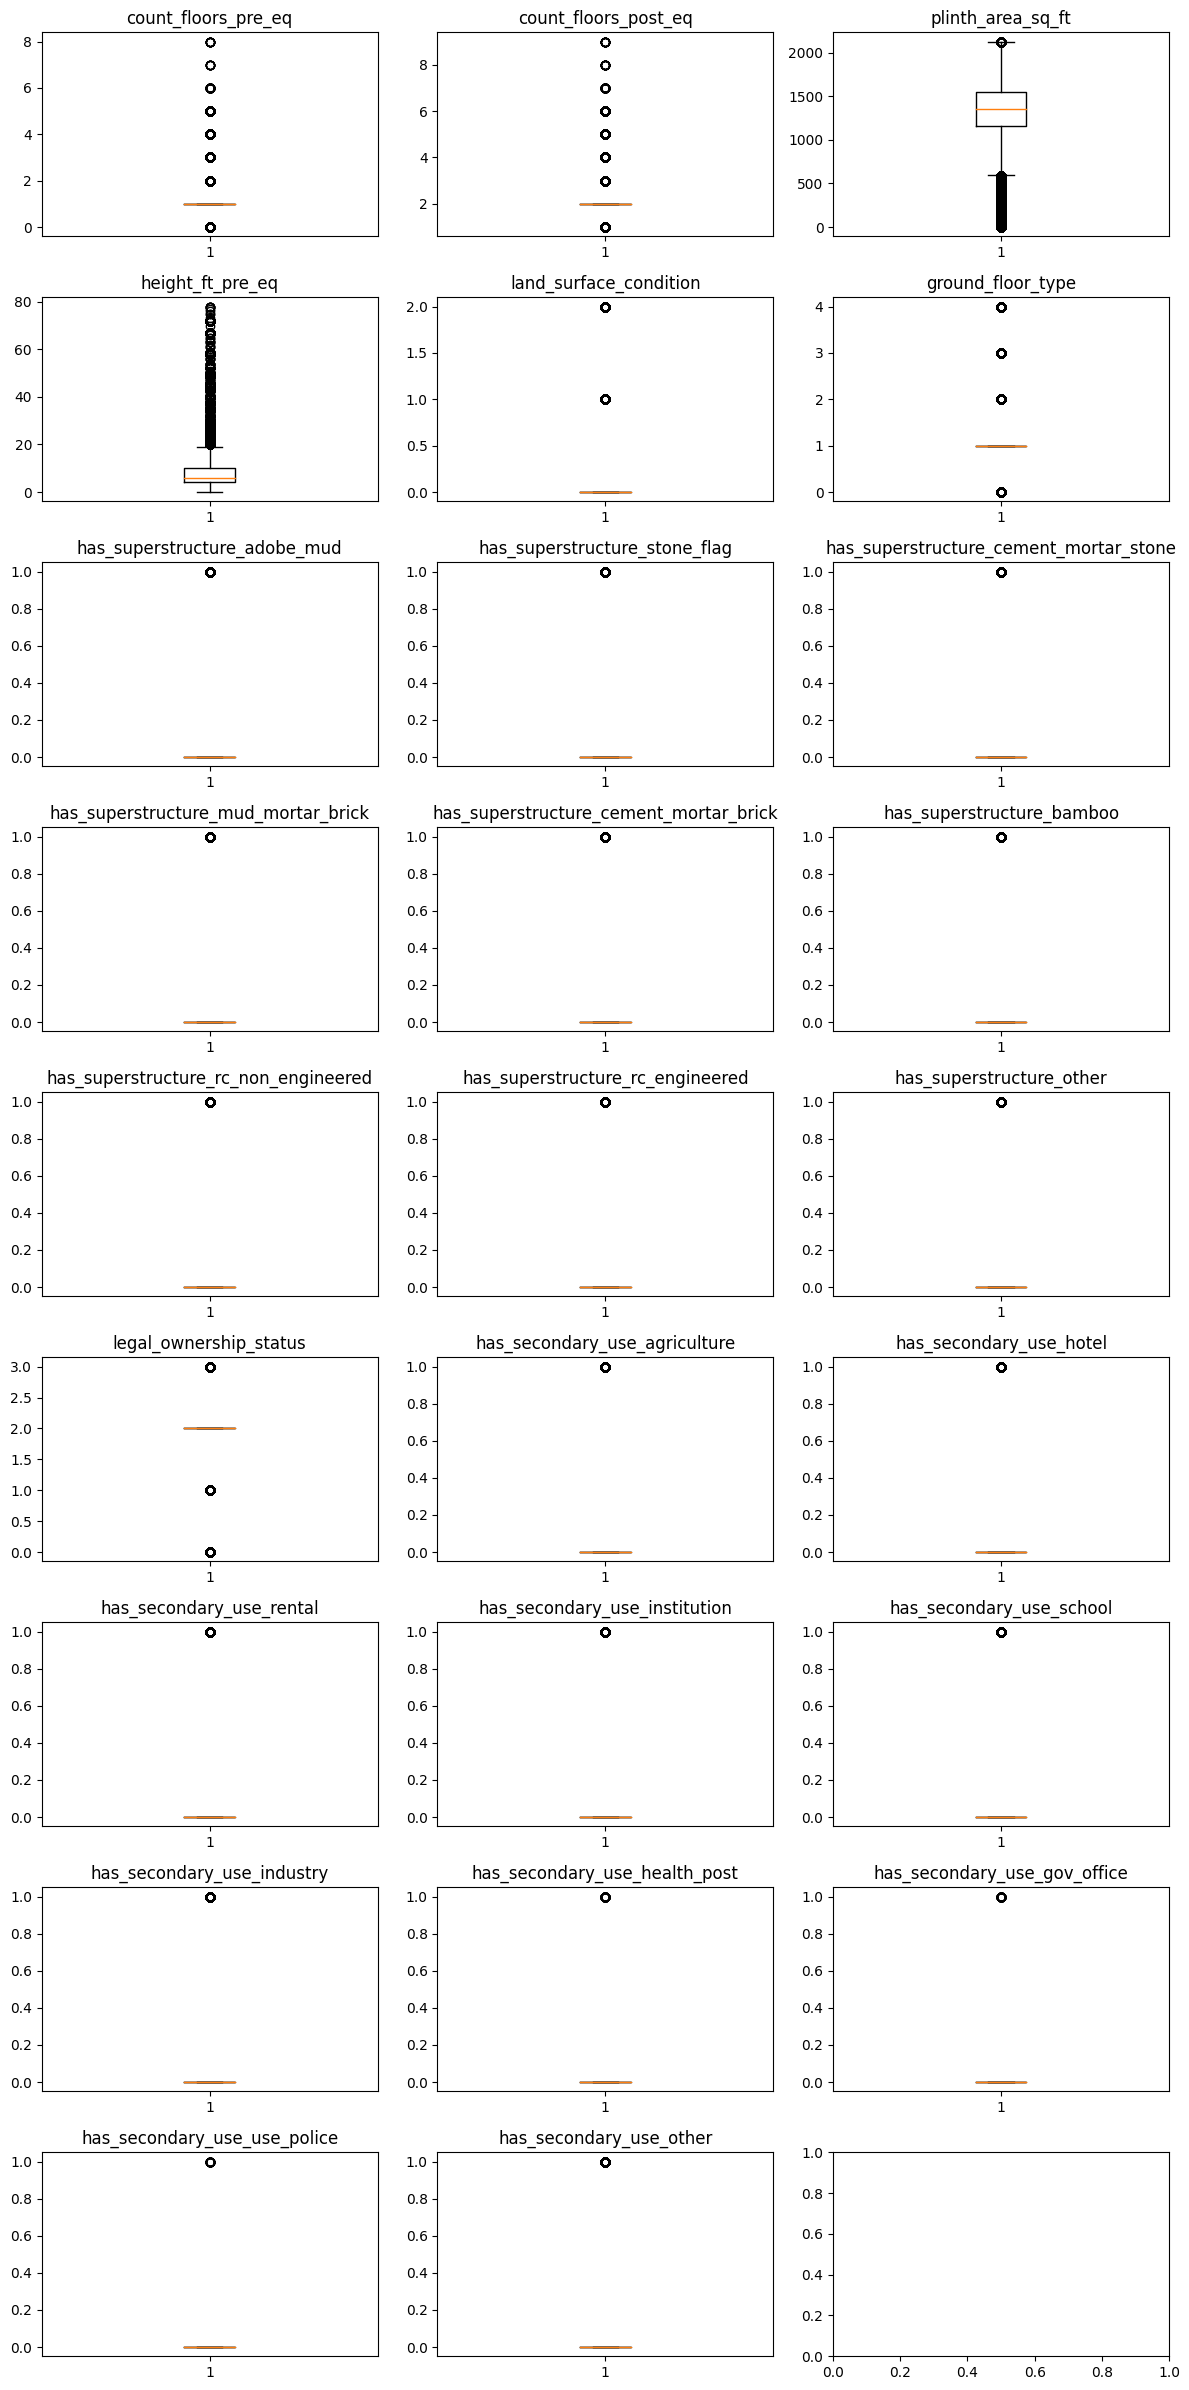

In [28]:

cols = columns_with_outliers

fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(12, 24))

for i, cols in enumerate(cols):
    # print(i, col)
    row = i // 3
    col = i % 3
    axs[row, col].boxplot(df_merged[cols])
    axs[row, col].set_title(cols)

plt.tight_layout()
plt.show()


Now, we use IQR to remove the outliers

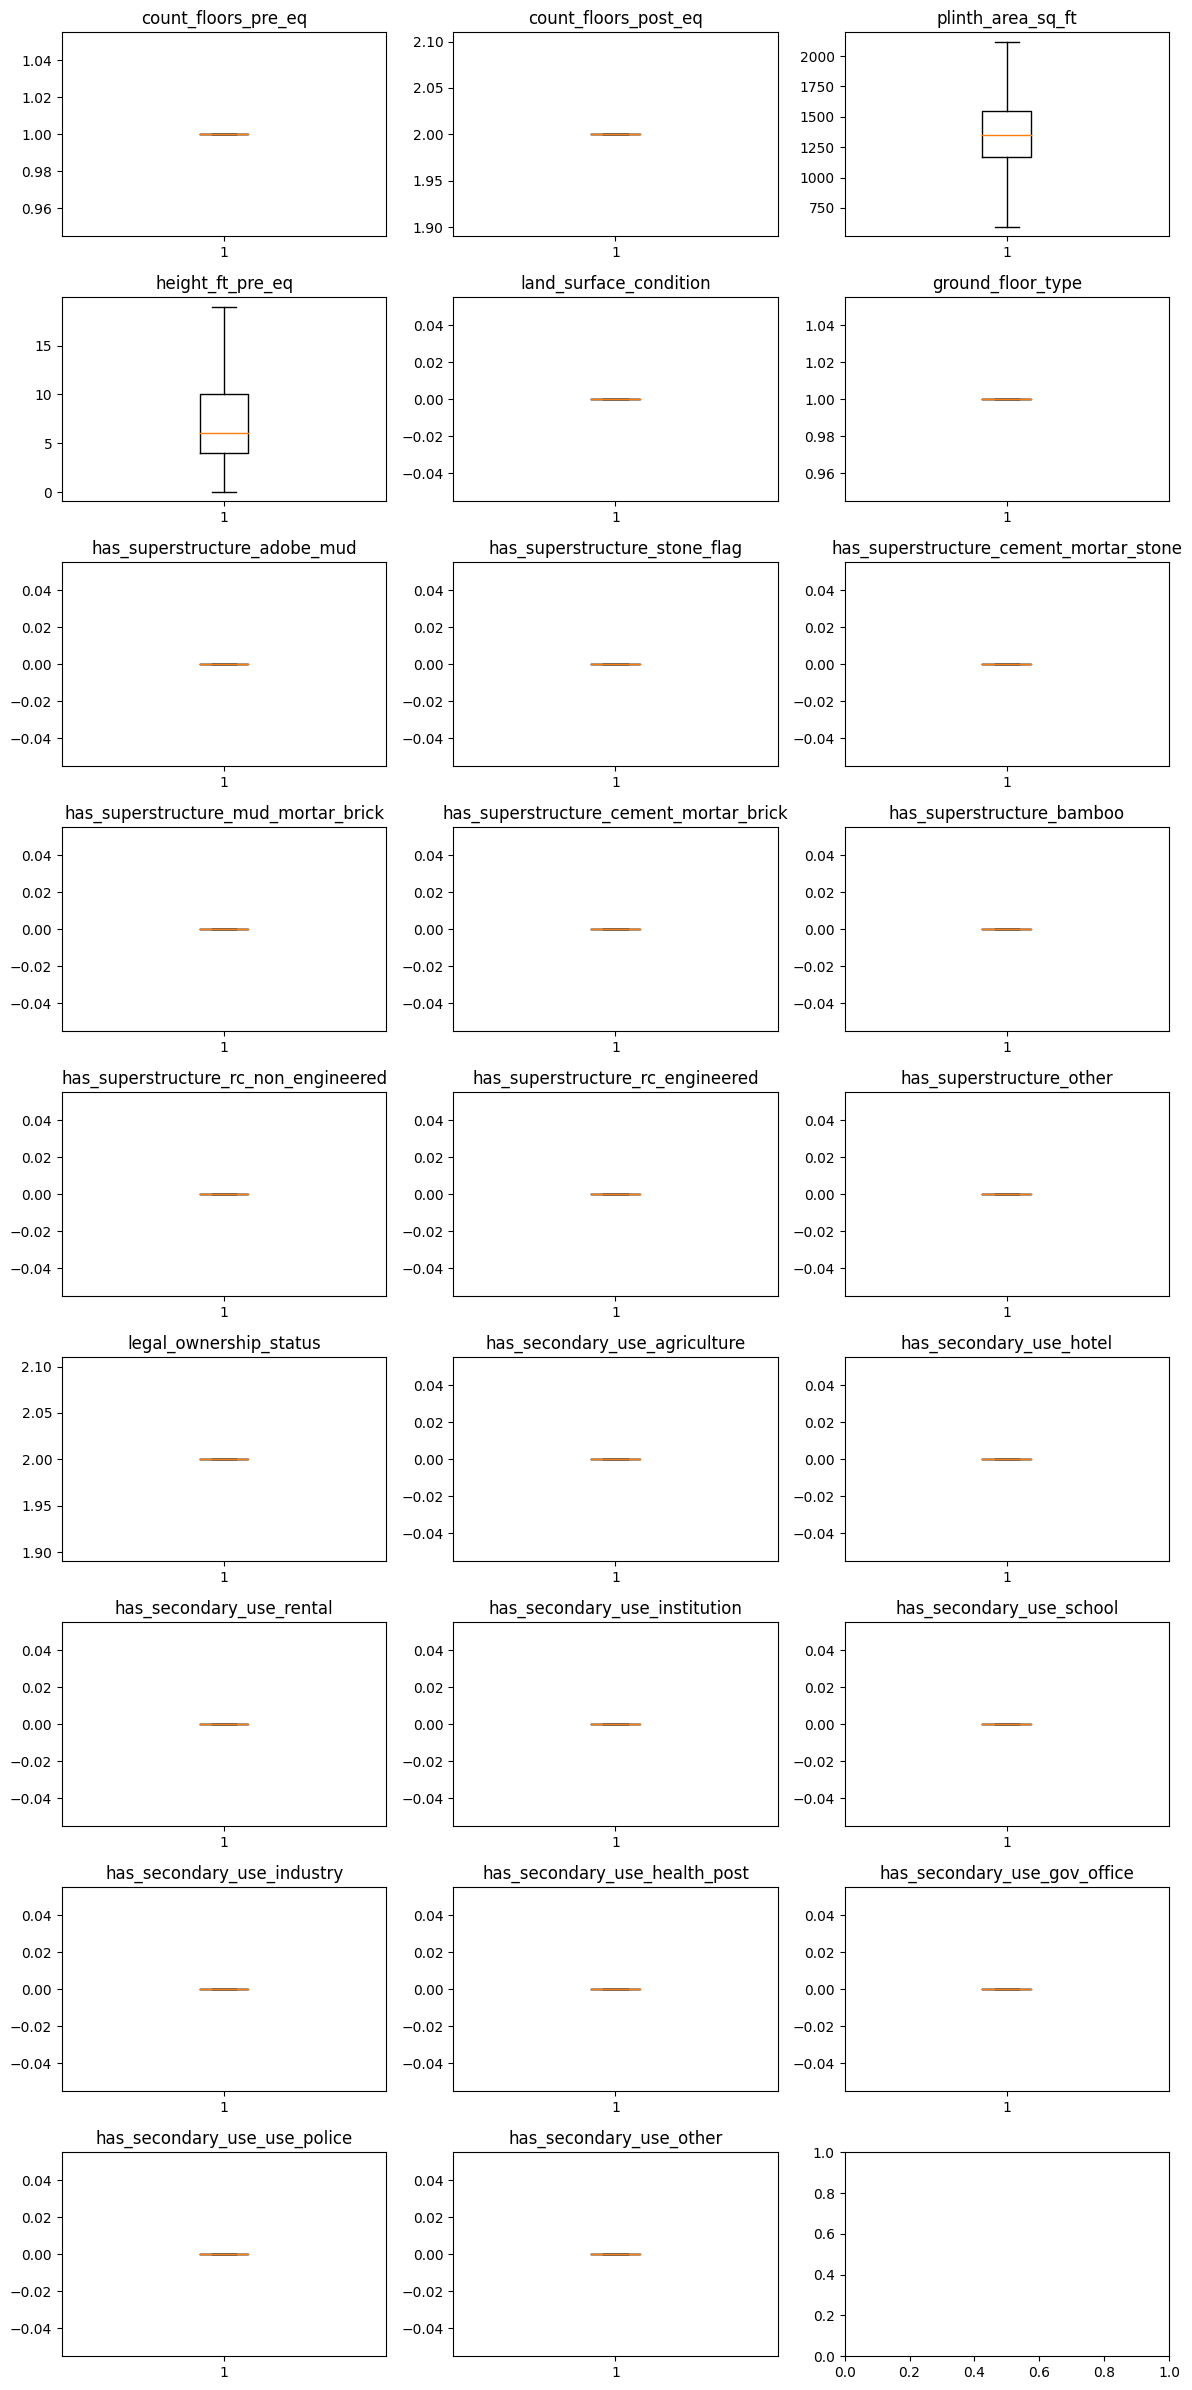

In [29]:
from scipy.stats import iqr
outliers = columns_with_outliers

for col in outliers:    
  above = df_merged[col].quantile(0.75)+1.5*iqr(df_merged[col])
  below = df_merged[col].quantile(0.25)-1.5*iqr(df_merged[col])
  df_merged[col]=df_merged[col].mask(df_merged[col]>above, above)
  df_merged[col]=df_merged[col].mask(df_merged[col]<below, below)
  
  
cols = columns_with_outliers

fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(12, 24))

for i, cols in enumerate(cols):
    # print(i, col)
    row = i // 3
    col = i % 3
    axs[row, col].boxplot(df_merged[cols])
    axs[row, col].set_title(cols)

plt.tight_layout()
plt.show()

Step-7: Saving the cleaned CSV

In [30]:
df_merged.to_csv('merged_data.csv', index = False)

In [31]:
df = pd.read_csv('merged_data.csv')

<h2>Exploratory Data Analysis</h2>

In [ ]:
df = df.drop(['district_id_y','vdcmun_id_y','ward_id_y'],axis = 1) 

Plot 1: Age of the building
- Table used: Structure of buildings
- By: Navyadhara

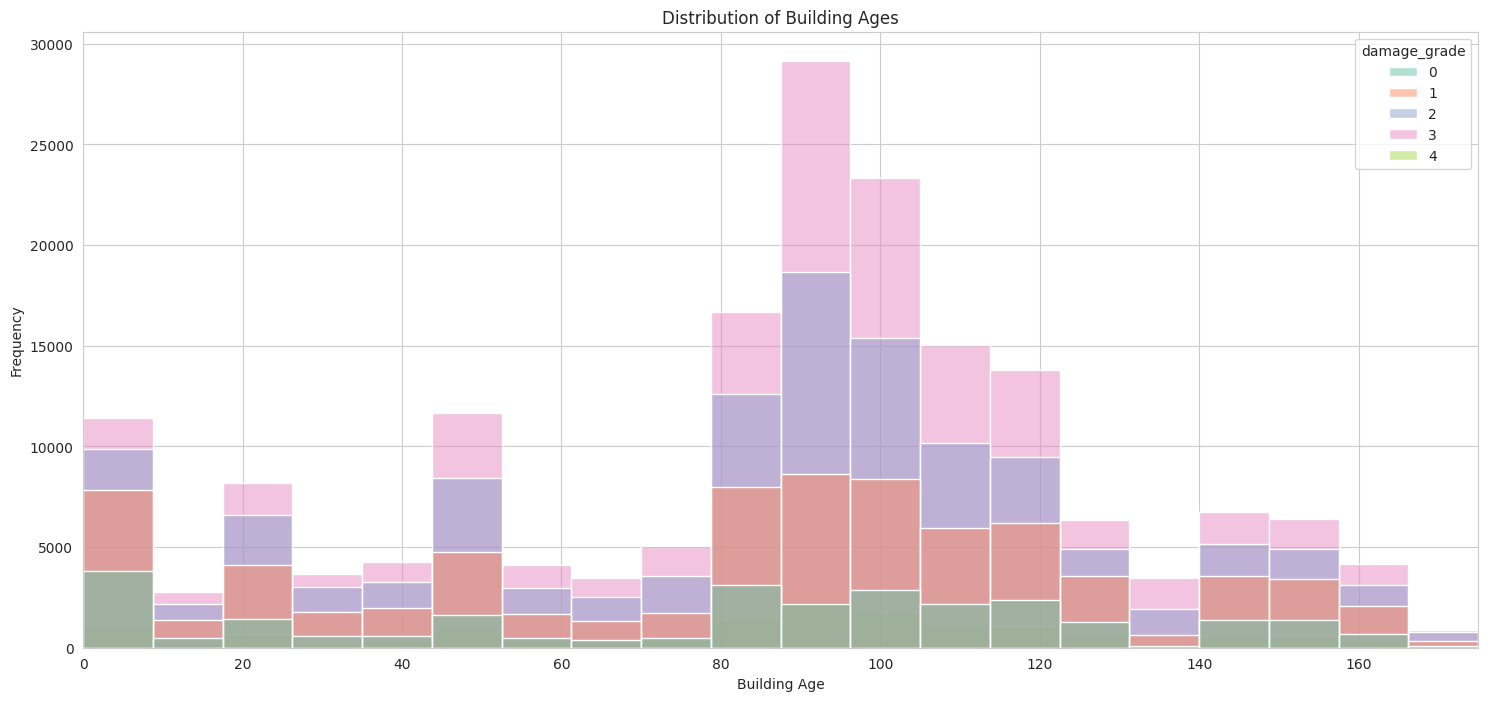

In [ ]:
min_age = df['age_building'].min()
max_age = df['age_building'].max()

plt.figure(figsize=(18, 8))
sns.histplot(data = df, x = 'age_building', bins=20, color='Teal', hue='damage_grade', palette='Set2')

plt.xlim(min_age, max_age)
plt.xlabel('Building Age')
plt.ylabel('Frequency')
plt.title('Distribution of Building Ages')


# Show the plot
plt.show()

Plot 2: roof_type

- Table used: Structure of buildings
- By: Navyadhara

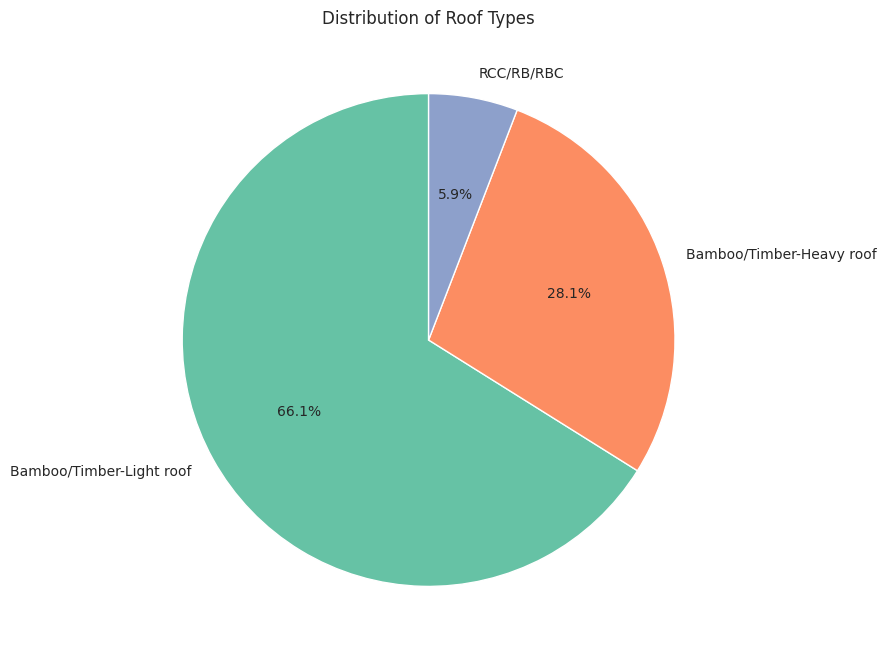

In [ ]:
roof_type_counts = df_structure['roof_type'].value_counts()
colors = sns.color_palette('Set2')


plt.figure(figsize=(8, 8))
plt.pie(roof_type_counts, labels=roof_type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Roof Types')
# Show the plot
plt.show()
